## Importing the preprocessed data back

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
prison_sentences = pd.read_csv('./data/prison_sentences_cleaned_05.csv')
print("Shape: ", prison_sentences.shape)
print("Columns: ", prison_sentences.columns)
prison_sentences.head()

Shape:  (380629, 38)
Columns:  Index(['courtDistrict_id', 'drugCase_safetyValve', 'sentence_zone',
       'restitution_cost', 'fine_cost', 'prisonSentence_months',
       'defendant_age', 'offenseLevel_plusChapter2SOCs', 'citizenship_status',
       'defendant_has_criminalHistory', 'criminalHistoryPoints_subtotal',
       'defendant_disposition', 'drug_types', 'pleaAgreement_documentStatus',
       'defendant_educationLevel', 'defendant_race', 'defendant_gender',
       'defendantSentences_last60days', 'received_prison_sentence',
       'probationSentence_months', 'sentence_type',
       'criminalHistoryPoints_applied', 'multipleOffense_unitsAdjustment',
       'SOC_weaponEnhancement', 'statutoryPrisonTerm_min',
       'statutoryPrisonTerm_max', 'sentence_year', 'case_filling_date',
       'court_name', 'armedCareerCriminal_status', 'supervisedRelease_months',
       'supervisedRelease_underUSCode', 'fine_cost_underUSCode',
       'USCode_dispositionType', 'prisonSentence_months_underU

,courtDistrict_id,drugCase_safetyValve,sentence_zone,restitution_cost,fine_cost,prisonSentence_months,defendant_age,offenseLevel_plusChapter2SOCs,citizenship_status,defendant_has_criminalHistory,...,court_name,armedCareerCriminal_status,supervisedRelease_months,supervisedRelease_underUSCode,fine_cost_underUSCode,USCode_dispositionType,prisonSentence_months_underUSCode,judge_appointment_politicalLeaning,has_supervisionCost,judge_isFemale
0,1,0.0,D,0.0,0.0,24.0,26.0,24.0,3.0,1.0,...,U.S. District Court for the District of Columbia,0.0,36.0,36,0.0,4,24,-1,0,1
1,1,0.0,B,0.0,0.0,8.0,29.0,12.0,3.0,1.0,...,U.S. District Court for the District of Columbia,0.0,36.0,36,0.0,4,8,-1,0,1
2,1,0.0,B,0.0,0.0,3.0,36.0,8.0,3.0,1.0,...,U.S. District Court for the District of Columbia,0.0,12.0,12,0.0,4,3,-1,0,1
3,1,0.0,D,99158.0,0.0,18.0,43.0,14.0,1.0,1.0,...,U.S. District Court for the District of Columbia,0.0,36.0,36,0.0,4,18,-1,0,1
4,1,1.0,D,0.0,0.0,27.0,62.0,24.0,1.0,1.0,...,U.S. District Court for the District of Columbia,0.0,60.0,60,0.0,4,27,-1,0,1


In [8]:
prison_sentences['case_filling_date'] = pd.to_datetime(prison_sentences['case_filling_date'], errors='coerce')

In [9]:
categorical_features = [
    'sentence_zone',
    'courtDistrict_id',
    'court_name',
    'USCode_dispositionType',
    'sentence_type',
    'citizenship_status',
    'defendant_disposition',
    'pleaAgreement_documentStatus',
    'defendant_race',
]
for col in categorical_features:
    prison_sentences[col] = prison_sentences[col].astype('category')

In [10]:
binary_features = [
    'drugCase_safetyValve',
    'defendant_has_criminalHistory',
    'defendant_gender',
    'received_prison_sentence',
    'SOC_weaponEnhancement',
    'armedCareerCriminal_status',
    'has_supervisionCost',
    'judge_isFemale'
]

In [11]:
num_features = [col for col in prison_sentences.columns if col not in categorical_features and col not in binary_features]

In [12]:
prison_sentences.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380629 entries, 0 to 380628
Data columns (total 38 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   courtDistrict_id                    380629 non-null  category      
 1   drugCase_safetyValve                380629 non-null  float64       
 2   sentence_zone                       380629 non-null  category      
 3   restitution_cost                    380629 non-null  float64       
 4   fine_cost                           380629 non-null  float64       
 5   prisonSentence_months               380629 non-null  float64       
 6   defendant_age                       380629 non-null  float64       
 7   offenseLevel_plusChapter2SOCs       380629 non-null  float64       
 8   citizenship_status                  380629 non-null  category      
 9   defendant_has_criminalHistory       380629 non-null  float64       
 10  criminal

## Basic EDA

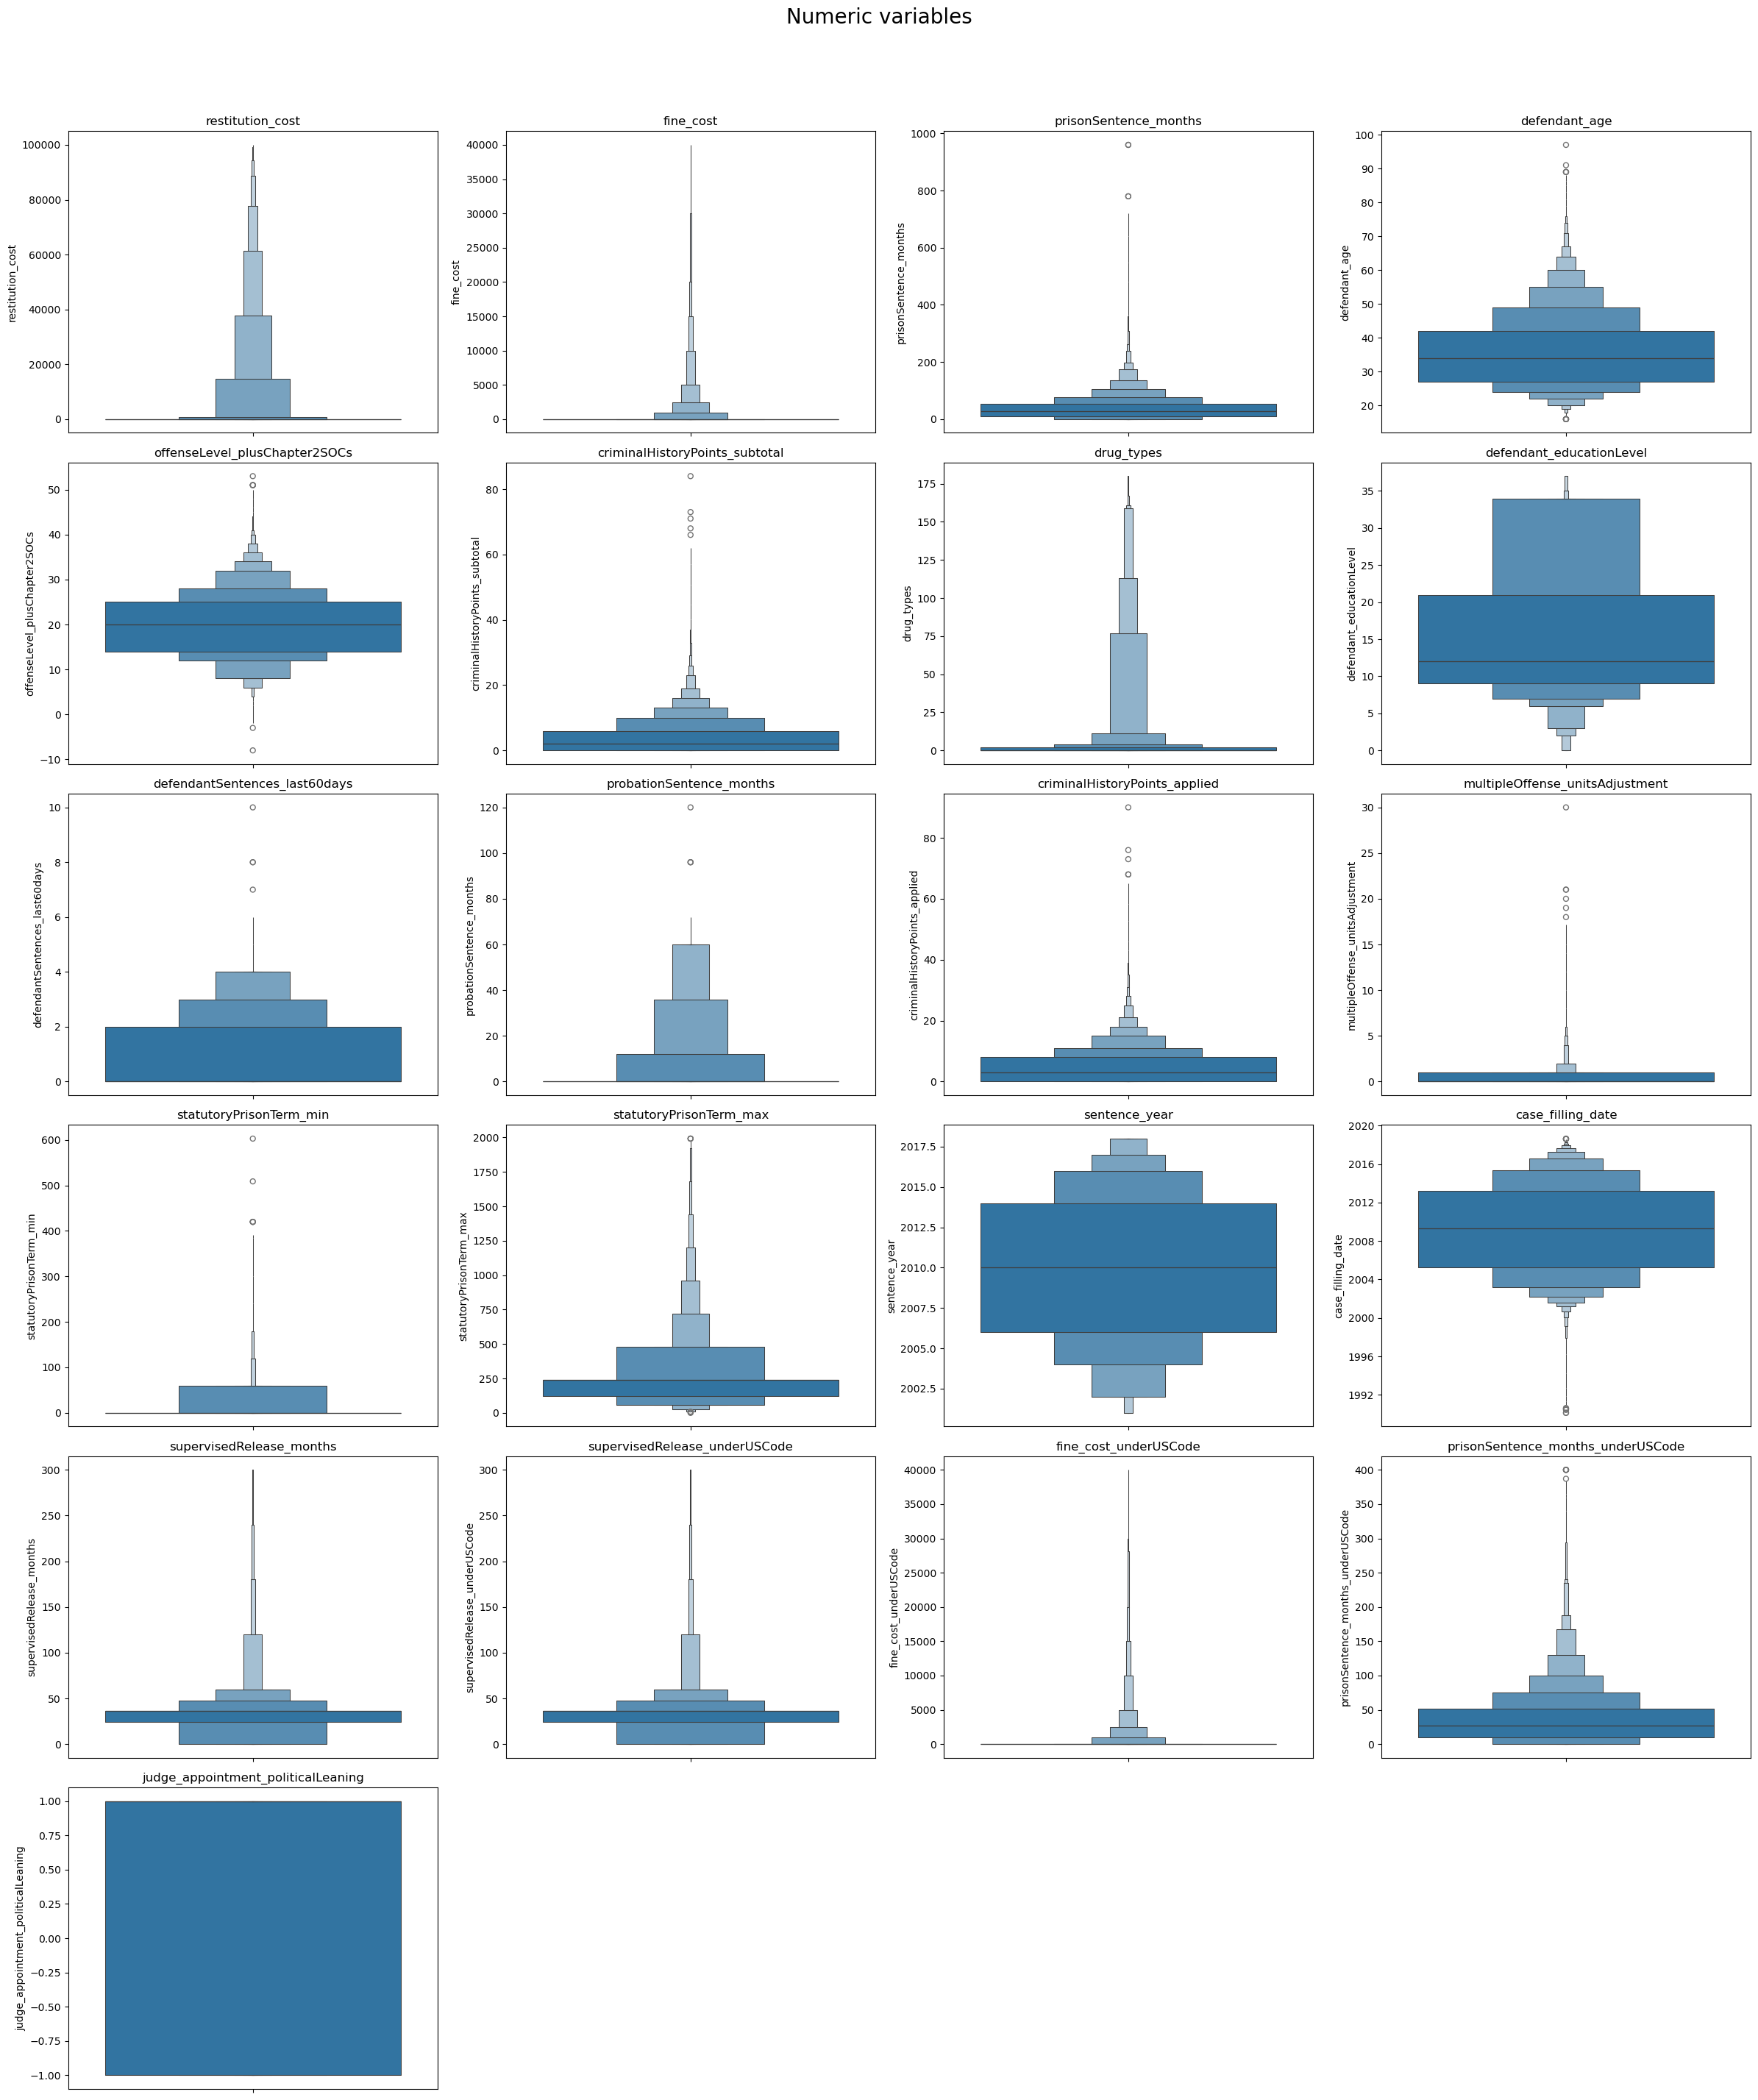

In [14]:
# boxen plots of filtered numerical variables
n_cols = 4
n_rows = int(np.ceil(len(num_features) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten()
for i, col in enumerate(num_features):
    sns.boxenplot(y=prison_sentences[col], ax=axes[i])
    axes[i].set_title(col)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
fig.suptitle("Numeric variables", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

/tmp/ipython-input-23-1093389431.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=prison_sentences, x='received_prison_sentence', palette='Set2')


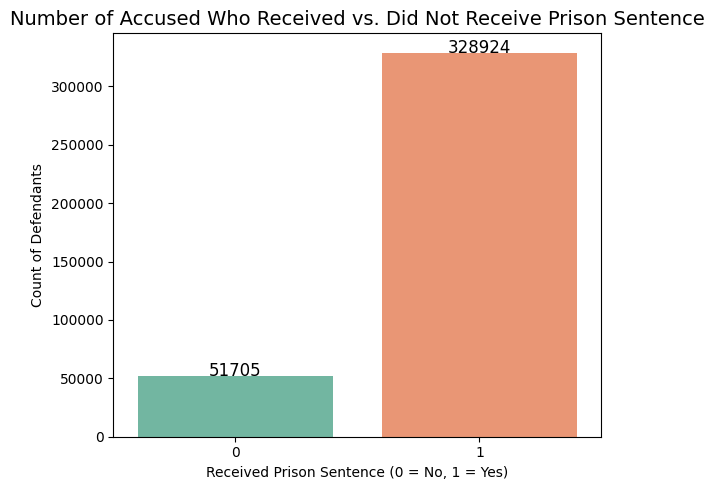

In [ ]:
# Ensure the column is binary (0/1 or True/False) and not NaN
if prison_sentences['received_prison_sentence'].isnull().any():
    prison_sentences = prison_sentences[prison_sentences['received_prison_sentence'].notnull()]

# Plot
plt.figure(figsize=(6, 5))
sns.countplot(data=prison_sentences, x='received_prison_sentence', palette='Set2')

# Enhancements
plt.title('Number of Accused Who Received vs. Did Not Receive Prison Sentence', fontsize=14)
plt.xlabel('Received Prison Sentence (0 = No, 1 = Yes)')
plt.ylabel('Count of Defendants')

# Annotate the counts on top of bars
counts = prison_sentences['received_prison_sentence'].value_counts().sort_index()
for i, count in enumerate(counts):
    plt.text(i, count + 5, str(count), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# written by an LLM

Was there evidence of sentence fluctuation in time? If it were affected by sociopolitical factors, it may at this time; even more than once.

<Figure size 1200x600 with 0 Axes>

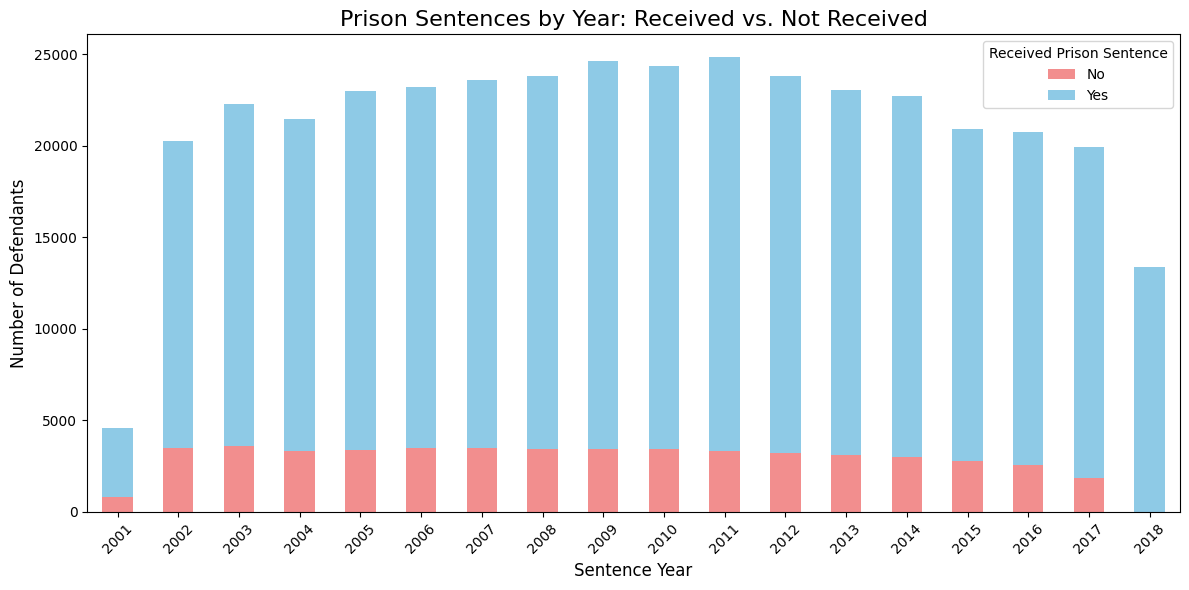

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure sentence_year is integer or category
prison_sentences['sentence_year'] = pd.to_numeric(prison_sentences['sentence_year'], errors='coerce')
prison_sentences = prison_sentences[prison_sentences['sentence_year'].notnull()]
prison_sentences['sentence_year'] = prison_sentences['sentence_year'].astype(int)

# Group and pivot the data
yearly_counts = (
    prison_sentences
    .groupby(['sentence_year', 'received_prison_sentence'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

# Plot stacked bar chart
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='bar', stacked=True, color=['#f28e8e', '#8ecae6'], figsize=(12, 6))

# Formatting
plt.title('Prison Sentences by Year: Received vs. Not Received', fontsize=16)
plt.xlabel('Sentence Year', fontsize=12)
plt.ylabel('Number of Defendants', fontsize=12)
plt.legend(title='Received Prison Sentence', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# written by an LLM

Does the political leaning of judges have any effect on how many people they sentence and for how long?

Text(0.5, 0.98, 'Received Prison Sentence by Judge Political Leaning')

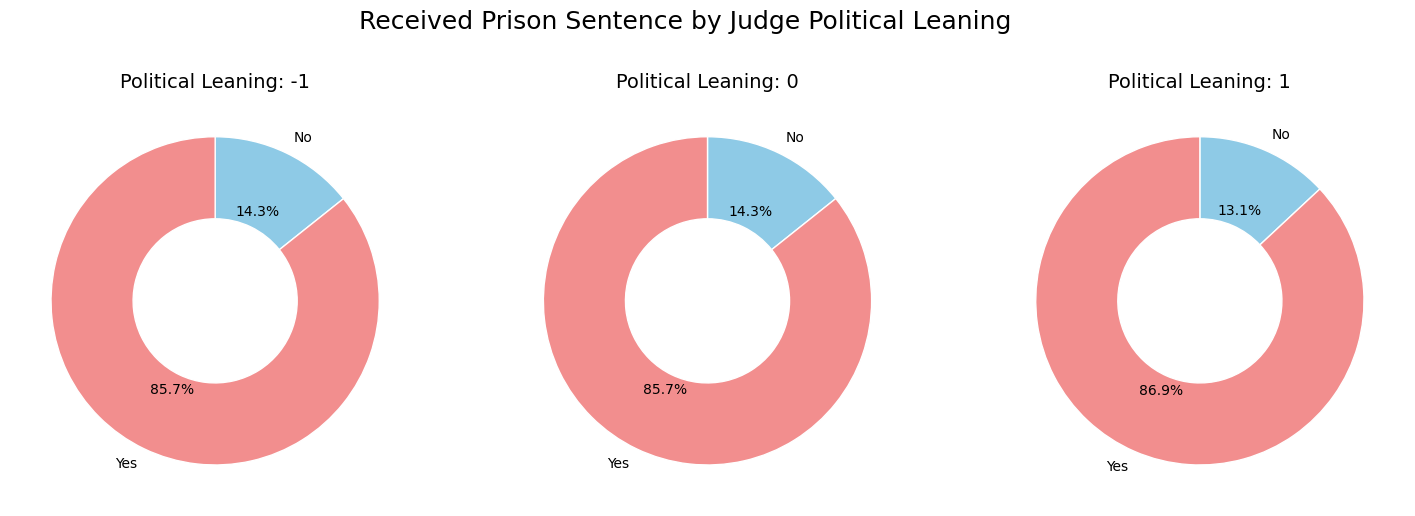

In [60]:
# Pie charts of received_prison_sentence by judge_appointment_politicalLeaning
plt.figure(figsize=(18, 6))
political_leanings = sorted(prison_sentences['judge_appointment_politicalLeaning'].dropna().unique())
colors = ['#8ecae6', '#f28e8e']

for i, leaning in enumerate(political_leanings):
    ax = plt.subplot(1, 3, i+1)
    subset = prison_sentences[prison_sentences['judge_appointment_politicalLeaning'] == leaning]
    counts = subset['received_prison_sentence'].value_counts().sort_index()
    labels = ['No', 'Yes'] if set(counts.index) == {0, 1} or set(counts.index) == {1, 0} else counts.index.astype(str)
    ax.pie(
        counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        colors=colors[:len(counts)],
        wedgeprops=dict(width=0.5, edgecolor='w')
    )
    ax.set_title(f'Political Leaning: {leaning}', fontsize=14)

plt.suptitle('Received Prison Sentence by Judge Political Leaning', fontsize=18)

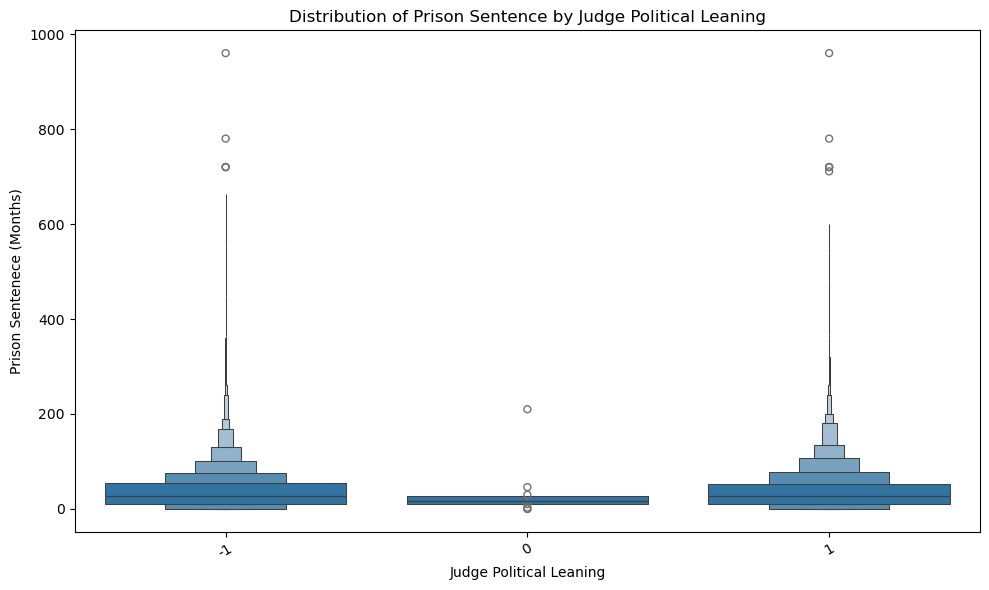

In [62]:
plt.figure(figsize=(10, 6))
sns.boxenplot(
    data=prison_sentences,
    x='judge_appointment_politicalLeaning',
    y='prisonSentence_months'
)
plt.title('Distribution of Prison Sentence by Judge Political Leaning')
plt.xlabel('Judge Political Leaning')
plt.ylabel('Prison Sentenece (Months)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

What about sentence limits? Are judge-assigned sentences in the upper or lower side of the spectrum?

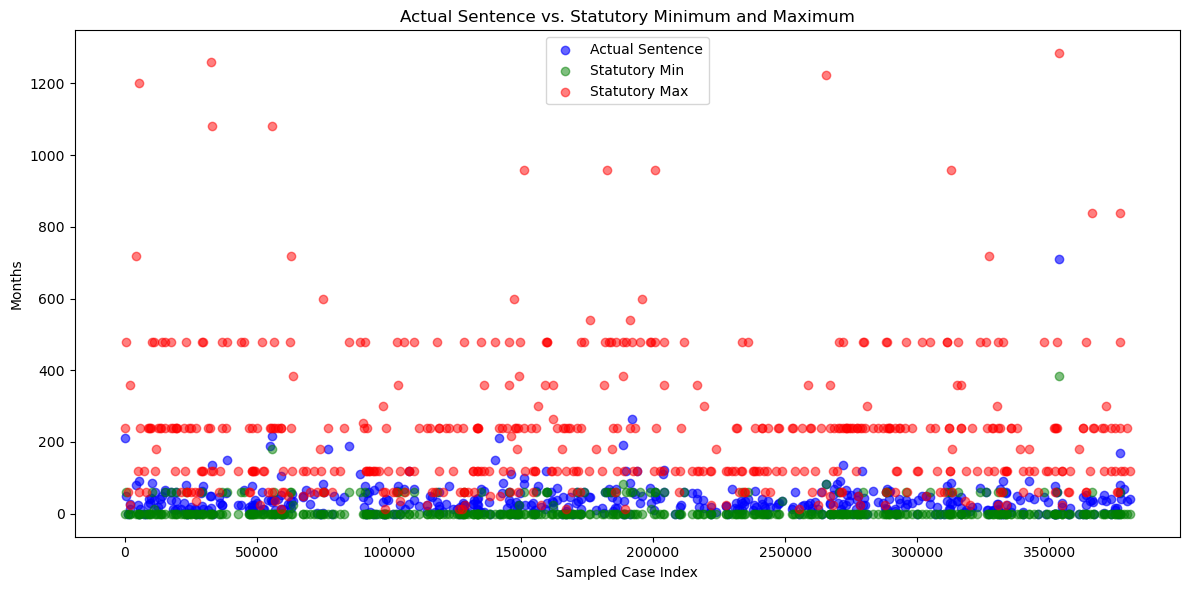

In [59]:
import matplotlib.pyplot as plt

# Make sure to use your renamed columns
cols = ['prisonSentence_months', 'statutoryPrisonTerm_min', 'statutoryPrisonTerm_max']
df_chart = prison_sentences[cols].dropna().astype(float)

# Optional: sample to prevent overplotting
df_sample = df_chart.sample(n=500, random_state=1)

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(df_sample.index, df_sample['prisonSentence_months'], label='Actual Sentence', color='blue', alpha=0.6)
plt.scatter(df_sample.index, df_sample['statutoryPrisonTerm_min'], label='Statutory Min', color='green', alpha=0.5)
plt.scatter(df_sample.index, df_sample['statutoryPrisonTerm_max'], label='Statutory Max', color='red', alpha=0.5)

plt.xlabel("Sampled Case Index")
plt.ylabel("Months")
plt.title("Actual Sentence vs. Statutory Minimum and Maximum")
plt.legend()
plt.tight_layout()
plt.show()

# written by an LLM

Does the same happen with fines? Are fines fine-tuned by judges like prison sentences do?

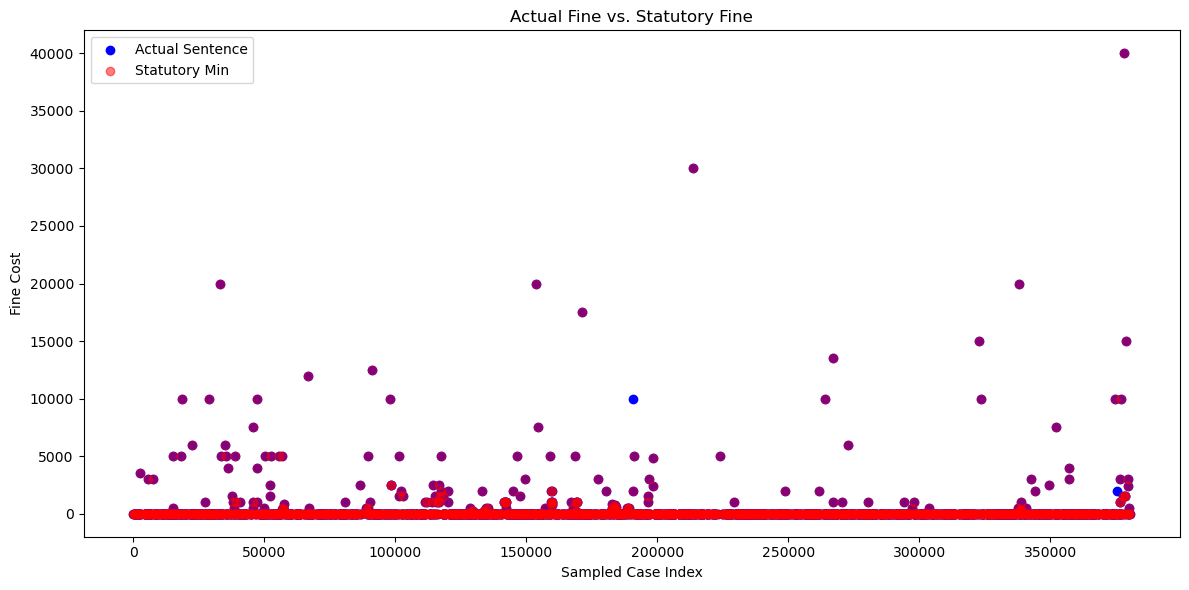

In [66]:
# Make sure to use your renamed columns
cols = ['fine_cost', 'fine_cost_underUSCode']
df_chart = prison_sentences[cols].dropna().astype(float)

# Optional: sample to prevent overplotting
df_sample = df_chart.sample(n=2000, random_state=1)

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(df_sample.index, df_sample['fine_cost'], label='Actual Sentence', color='blue', alpha=1)
plt.scatter(df_sample.index, df_sample['fine_cost_underUSCode'], label='Statutory Min', color='red', alpha=0.5)

plt.xlabel("Sampled Case Index")
plt.ylabel("Fine Cost")
plt.title("Actual Fine vs. Statutory Fine")
plt.legend()
plt.tight_layout()
plt.show()

# written by an LLM

Looks like they ain't.

Some general visualizations of categorical data:

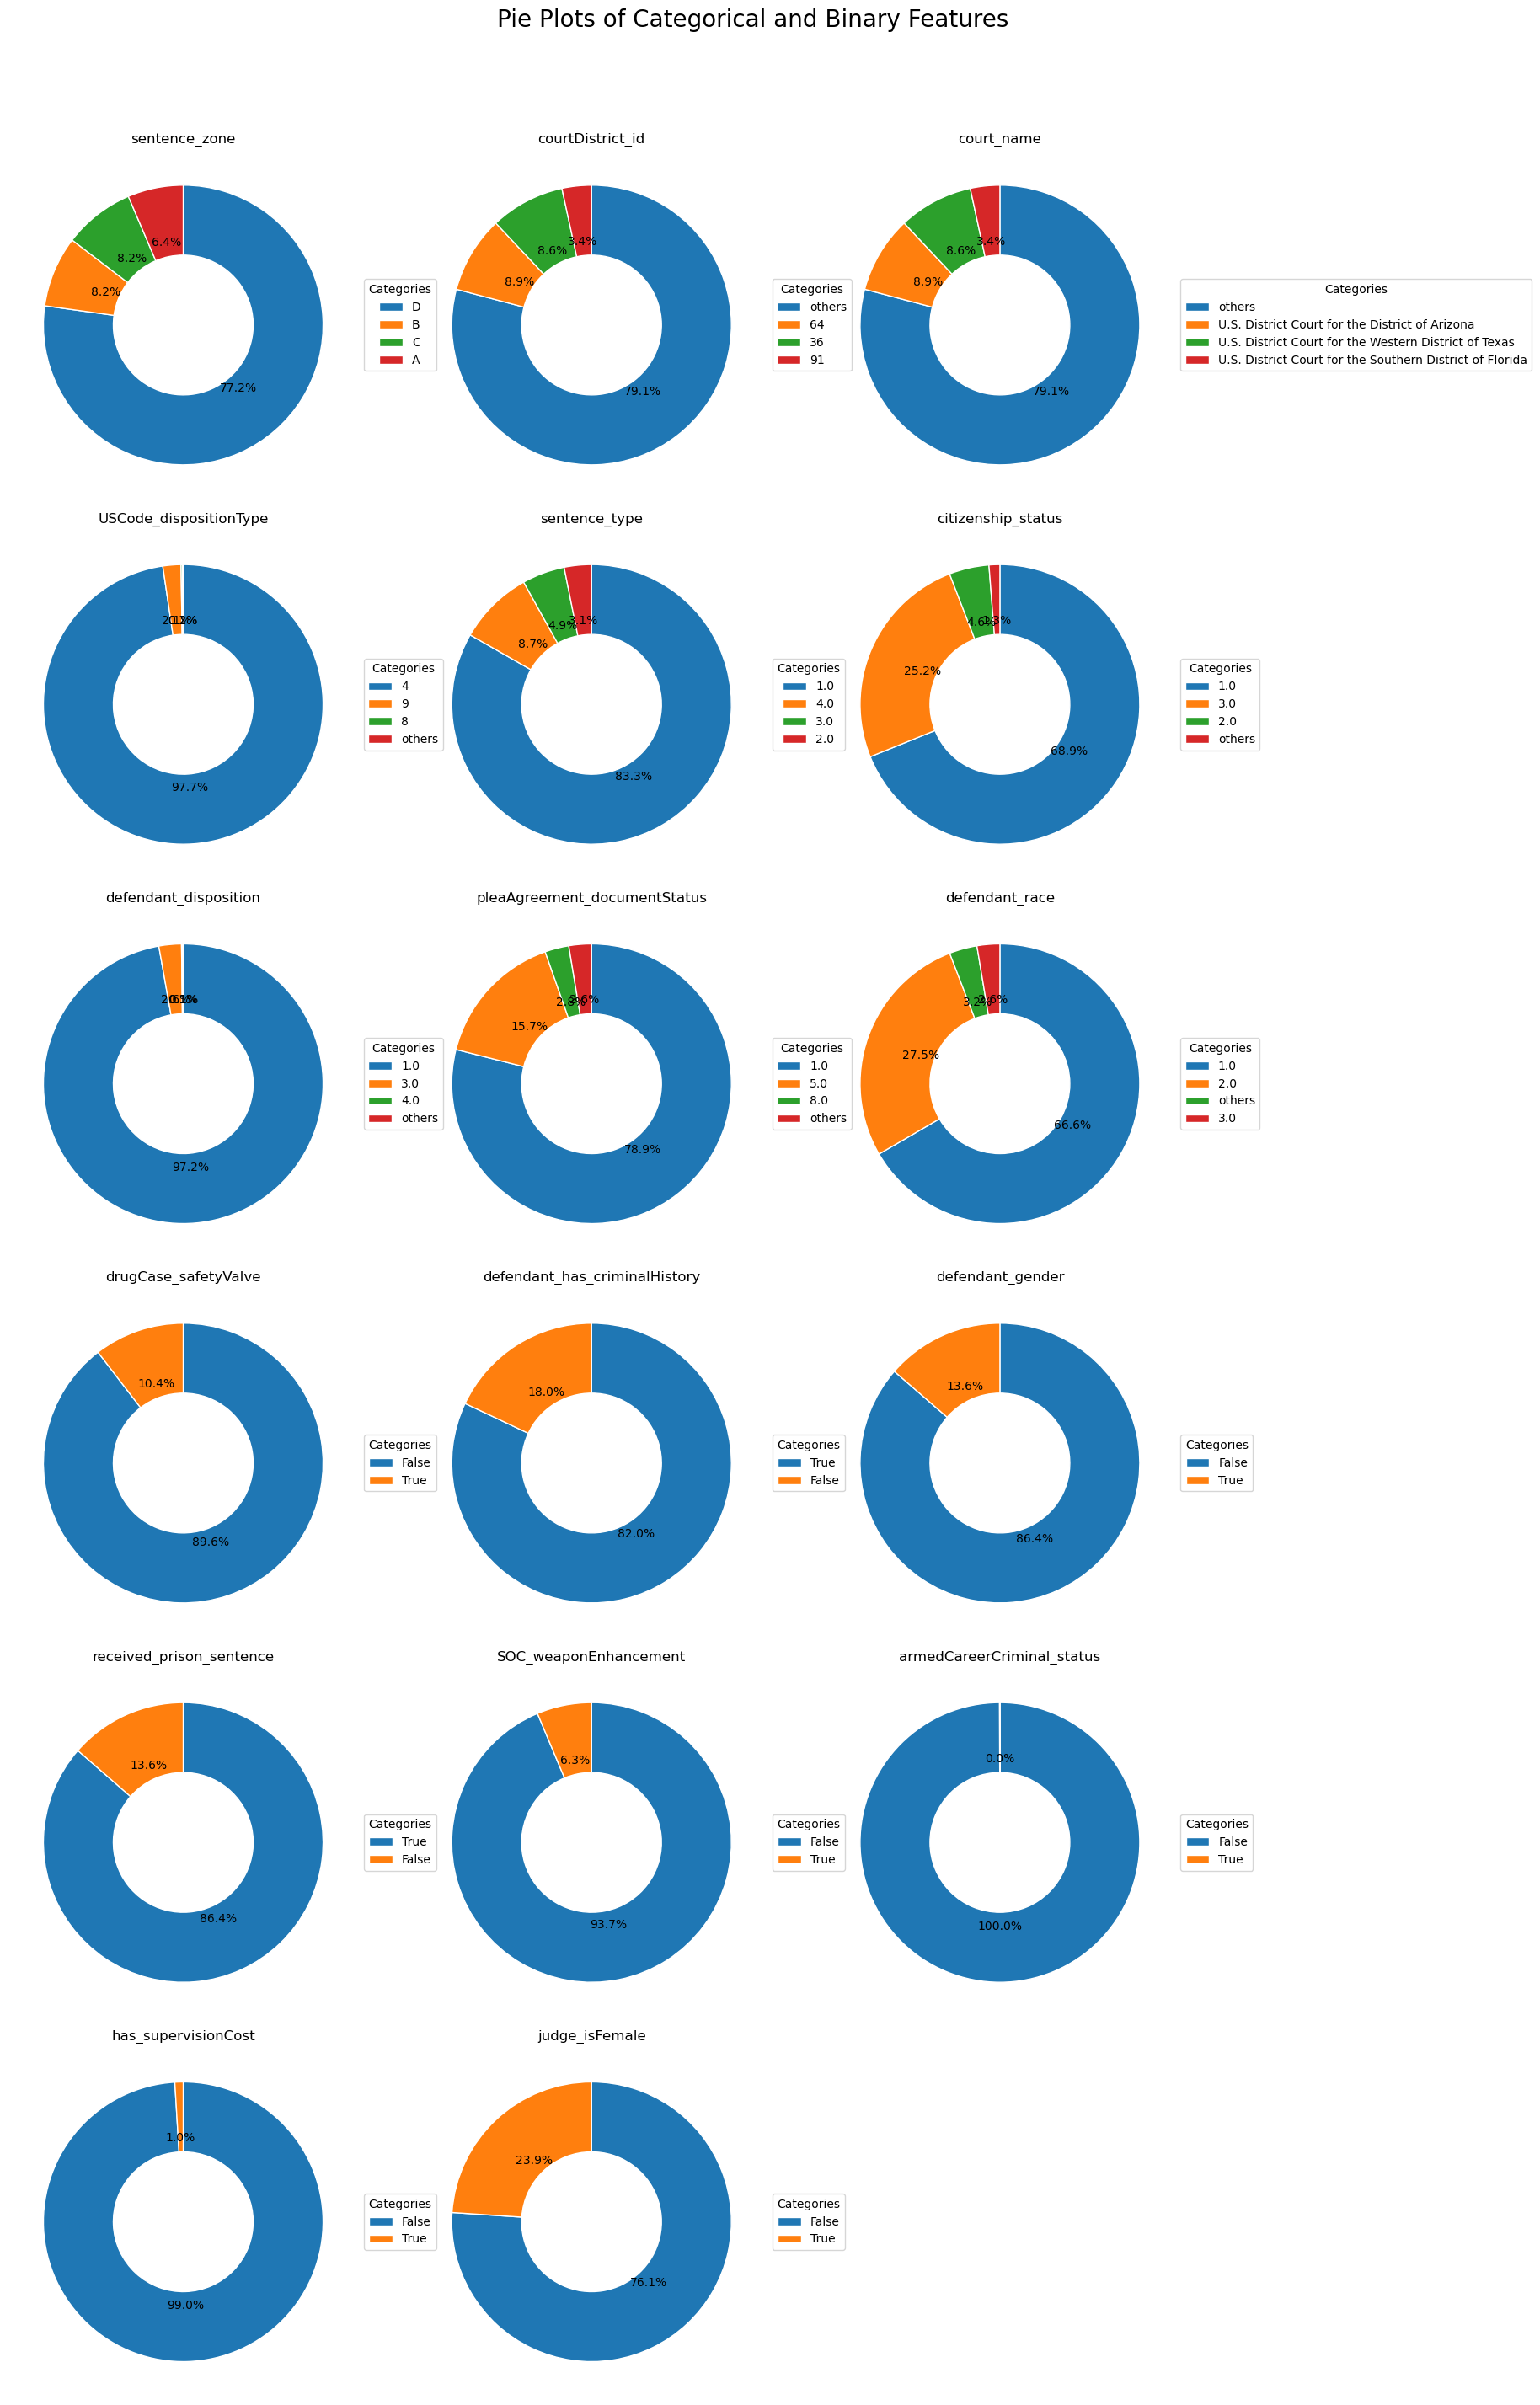

In [ ]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(all_features):
    merged_col = merge_small_categories(prison_sentences[col])
    data = merged_col.value_counts(dropna=False)
    labels = data.index.astype(str)
    # If binary, replace 1/0 with True/False in legend
    if col in binary_features:
        labels = ['True' if np.float64(x) == 1.0 else 'False' if np.float64(x) == 0 else str(x) for x in labels]
    wedges, texts, autotexts = axes[i].pie(
        data,
        labels=None,  # Remove direct labels from pie
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        wedgeprops=dict(width=0.5, edgecolor='w')
    )
    # Add legend outside the pie
    axes[i].legend(
        wedges, labels,
        title="Categories",
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        fontsize=10
    )
    axes[i].set_title(col, fontsize=12)

# Remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Pie Plots of Categorical and Binary Features', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# written by GPT-4.1 in Copilot with the following initial prompt:
# "Create a grid of pie plots for categorical and binary features. 
# Merge the lowest counts into 'others' if there are more than 4 categories. 
# Use the prison_sentences df."
# later edited both manually and by an LLM

In [ ]:
# Group all but the top 3 most frequent races into 'others'
race_counts = prison_sentences['defendant_race'].value_counts()
top3_races = race_counts.index[:3]
prison_sentences['defendant_race_grouped'] = prison_sentences['defendant_race'].apply(
    lambda x: x if x in top3_races else 'others'
)

# recovered from LLM-written code

Does race affect the involvement of people with the judiciary system?

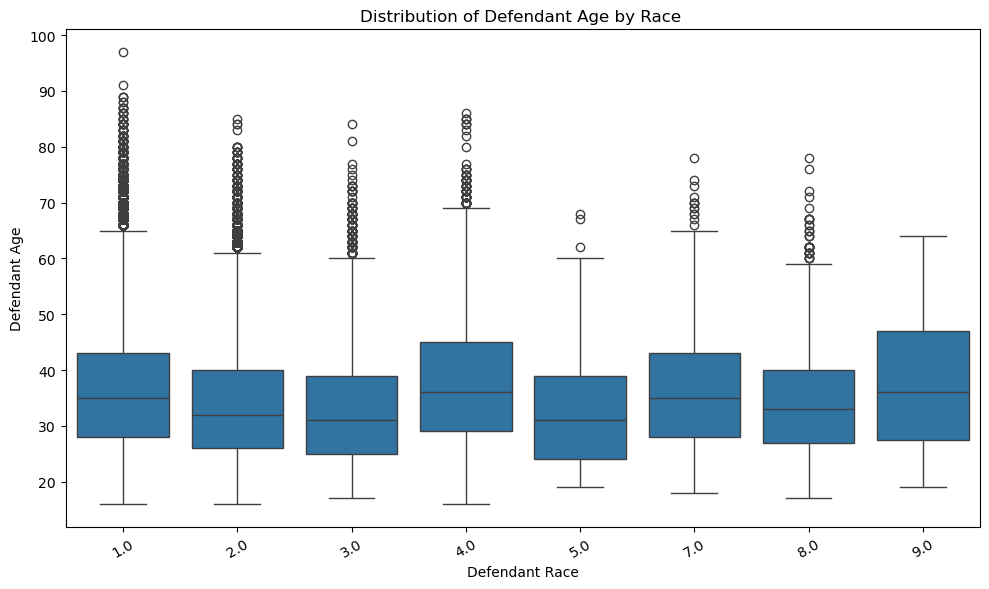

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=prison_sentences,
    x='defendant_race',
    y='defendant_age'
)
plt.title('Distribution of Defendant Age by Race ')
plt.xlabel('Defendant Race')
plt.ylabel('Defendant Age')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


Are people of different races charged more (given different sentences)?

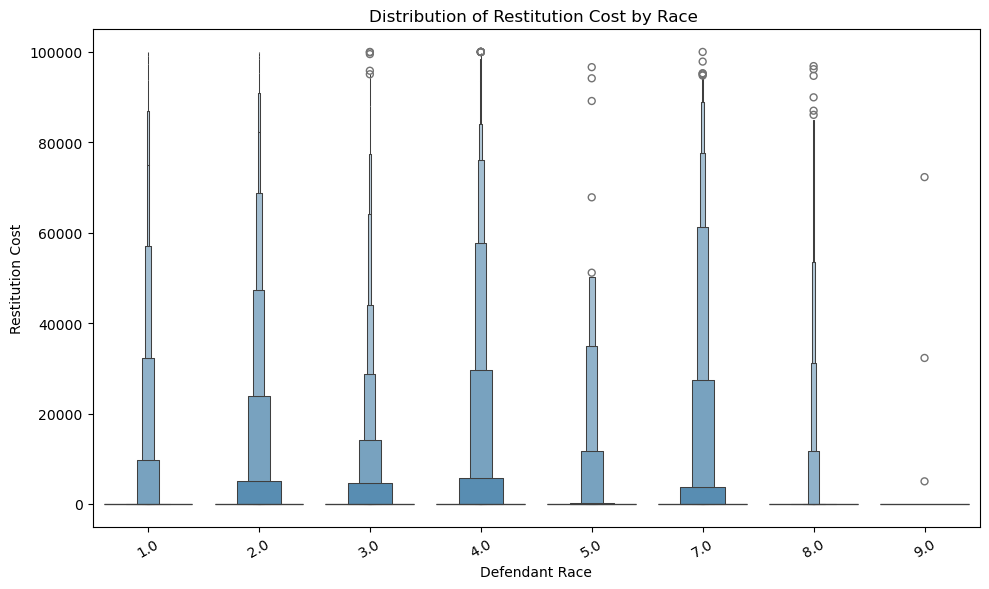

In [47]:
plt.figure(figsize=(10, 6))
sns.boxenplot(
    data=prison_sentences,
    x='defendant_race',
    y='restitution_cost'
)
plt.title('Distribution of Restitution Cost by Race ')
plt.xlabel('Defendant Race')
plt.ylabel('Restitution Cost')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

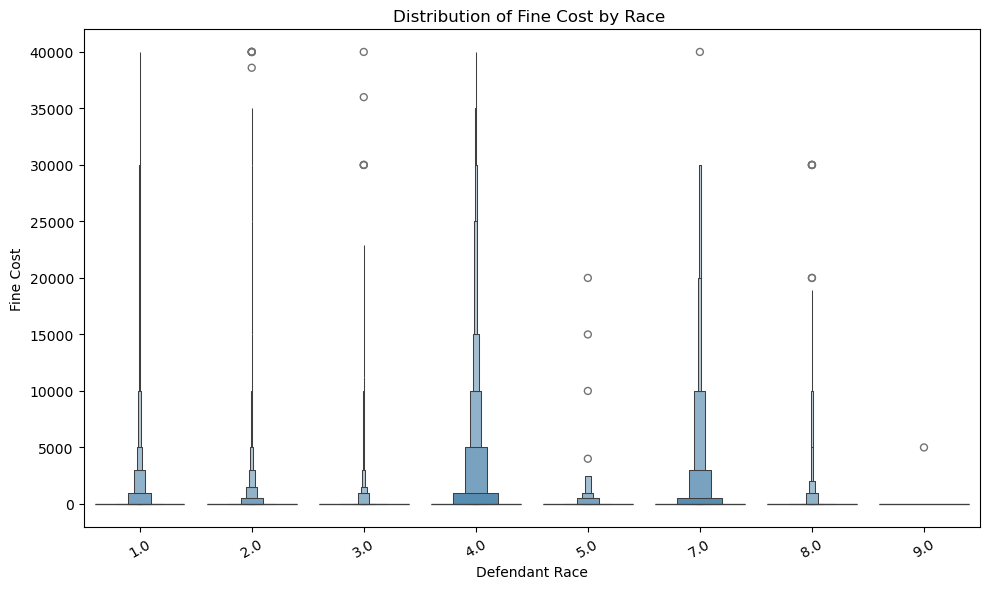

In [46]:
plt.figure(figsize=(10, 6))
sns.boxenplot(
    data=prison_sentences,
    x='defendant_race',
    y='fine_cost'
)
plt.title('Distribution of Fine Cost by Race ')
plt.xlabel('Defendant Race')
plt.ylabel('Fine Cost')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

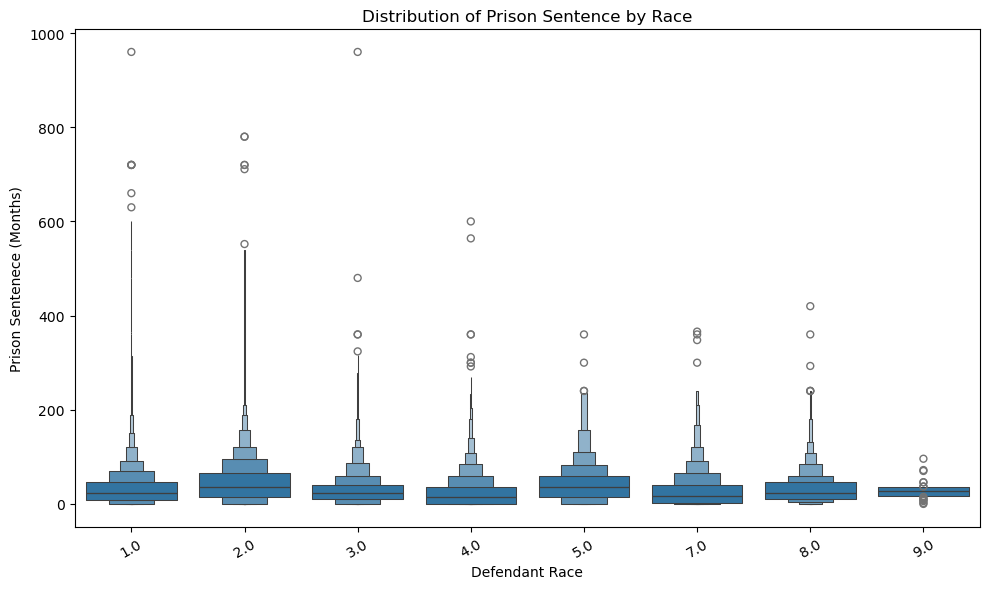

In [45]:
plt.figure(figsize=(10, 6))
sns.boxenplot(
    data=prison_sentences,
    x='defendant_race',
    y='prisonSentence_months'
)
plt.title('Distribution of Prison Sentence by Race')
plt.xlabel('Defendant Race')
plt.ylabel('Prison Sentenece (Months)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Altough slight, the largest difference seems to be in the assignation of criminal history points:

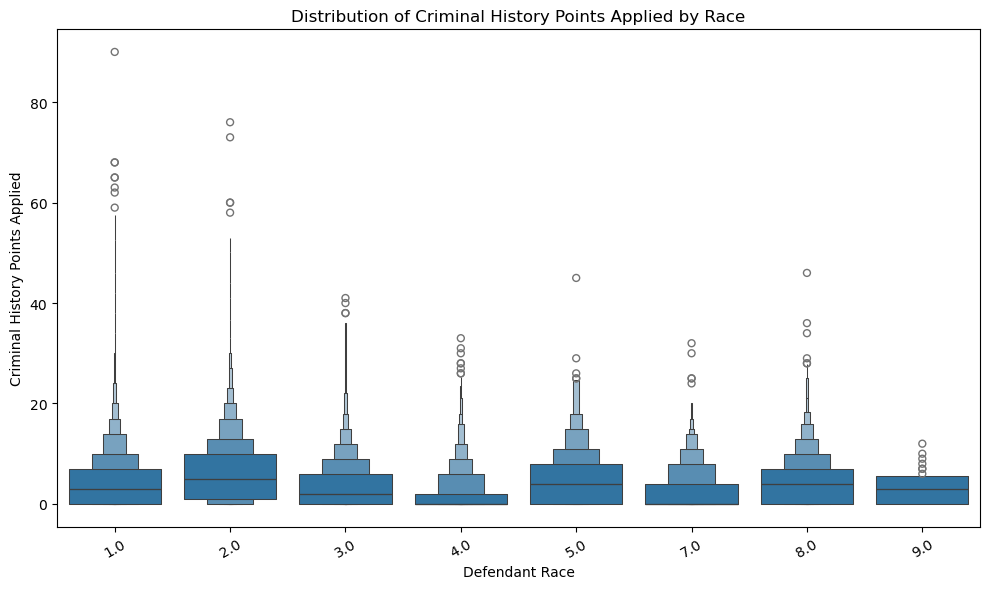

In [50]:
plt.figure(figsize=(10, 6))
sns.boxenplot(
    data=prison_sentences,
    x='defendant_race',
    y='criminalHistoryPoints_applied'
)
plt.title('Distribution of Criminal History Points Applied by Race')
plt.xlabel('Defendant Race')
plt.ylabel('Criminal History Points Applied')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()